<a href="https://colab.research.google.com/github/Arash-Kamboj/Quality-Assessment-project/blob/main/Quality_Assessment_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uploading dataset**


---




In [3]:
from google.colab import files
files.upload()

Saving Quality Assessment.dataset.csv to Quality Assessment.dataset (1).csv


{'Quality Assessment.dataset (1).csv': b'Id,Assembly Line,Quantity (lts.),CO2 dissolved,Time limit Crossed\r\n1263945,B,1.971072193,14.40161727,0\r\n1828129,B,2.073387733,14.13774996,0\r\n1871804,A,2.019491841,14.77438436,0\r\n1128634,A,2.004422297,15.13056493,0\r\n1848595,B,2.025784431,15.75647787,0\r\n1960254,B,2.070400454,12.94062032,0\r\n1669282,B,,16.66485112,0\r\n1036391,B,1.903054767,12.6044288,1\r\n1874678,A,1.990955836,14.97212021,0\r\n1619807,A,2.014521254,12.64505839,0\r\n1736635,B,2.050204421,14.51104747,0\r\n1321095,B,1.970827928,15.62646915,0\r\n1703785,A,2.00352747,13.13297644,0\r\n1670556,A,1.992049898,12.60601339,0\r\n1564466,A,,12.77388103,1\r\n1337450,B,1.944122706,13.36263814,0\r\n1546013,B,2.00624953,13.12576916,0\r\n1535896,A,1.999007644,12.84362604,1\r\n1321437,B,1.955247415,12.86329409,0\r\n1094205,A,2.016747723,14.05266859,0\r\n1325280,B,1.891834573,12.01492914,0\r\n1199050,b,1.958932568,14.52374185,0\r\n1130342,A,1.971349231,15.24481279,0\r\n1681927,A,1.968372

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import scipy.stats as stats
df = pd.read_csv('/content/Quality Assessment.dataset.csv')

In [5]:
df.head()

,Id,Assembly Line,Quantity (lts.),CO2 dissolved,Time limit Crossed
0,1263945,B,1.971072,14.401617,0
1,1828129,B,2.073388,14.137750,0
2,1871804,A,2.019492,14.774384,0
3,1128634,A,2.004422,15.130565,0
4,1848595,B,2.025784,15.756478,0


In [6]:
df.describe()

,Id,Quantity (lts.),CO2 dissolved,Time limit Crossed
count,2.990000e+02,293.000000,299.000000,299.000000
mean,1.506447e+06,1.997992,15.983235,0.180602
std,2.913488e+05,0.048517,15.322285,0.385333
min,1.004988e+06,1.891835,2.253454,0.000000
25%,1.240662e+06,1.968372,13.109196,0.000000
50%,1.520300e+06,1.997947,14.064673,0.000000
75%,1.747329e+06,2.030391,15.139656,0.000000
max,1.999475e+06,2.109917,150.180978,1.000000


In [7]:
df.describe(include='all')

,Id,Assembly Line,Quantity (lts.),CO2 dissolved,Time limit Crossed
count,2.990000e+02,299,293.000000,299.000000,299.000000
unique,NaN,4,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN
freq,NaN,156,NaN,NaN,NaN
mean,1.506447e+06,NaN,1.997992,15.983235,0.180602
std,2.913488e+05,NaN,0.048517,15.322285,0.385333
min,1.004988e+06,NaN,1.891835,2.253454,0.000000
25%,1.240662e+06,NaN,1.968372,13.109196,0.000000
50%,1.520300e+06,NaN,1.997947,14.064673,0.000000
75%,1.747329e+06,NaN,2.030391,15.139656,0.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  299 non-null    int64  
 1   Assembly Line       299 non-null    object 
 2   Quantity (lts.)     293 non-null    float64
 3   CO2 dissolved       299 non-null    float64
 4   Time limit Crossed  299 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 11.8+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
median = round(df['Quantity (lts.)'].median(),3)
print(f'The median vaue of Quantity (lts.) variable: {median}')

The median vaue of Quantity (lts.) variable: 1.998


In [11]:
co2_dissolved_range = df['CO2 dissolved'].max() - df['CO2 dissolved'].min()

# Round off to 2 decimal places
co2_dissolved_range = round(co2_dissolved_range, 2)

print("Range of CO2 dissolved feature:", co2_dissolved_range)

Range of CO2 dissolved feature: 147.93


In [12]:
df['Assembly Line'].nunique()

4

In [13]:
df['Assembly Line'].unique()

array(['B', 'A', 'b', 'a'], dtype=object)

In [14]:
df['Assembly Line'] = df['Assembly Line'].replace('b','B')
df['Assembly Line'] = df['Assembly Line'].replace('a','A')
print(df['Assembly Line'].nunique())
print(df['Assembly Line'].unique())


2
['B' 'A']


**Remove any empty or incomplete rows:**

Check if there are any rows with missing data. Substitute these values with the mean of numerical or mode for non-numerical data with respect to individual assembly lines.

In [15]:
df.isnull().sum()

Id                    0
Assembly Line         0
Quantity (lts.)       6
CO2 dissolved         0
Time limit Crossed    0
dtype: int64

In [16]:
df['Quantity (lts.)'] = df['Quantity (lts.)'].fillna(df['Quantity (lts.)'].mean())

In [17]:
df.isnull().sum()

Id                    0
Assembly Line         0
Quantity (lts.)       0
CO2 dissolved         0
Time limit Crossed    0
dtype: int64

**Check for Outliers:**

Check for outliers in the dataset and treating them accordingly.

---



In [18]:
# Calculate the interquartile range (IQR)
Q1 = df['CO2 dissolved'].quantile(0.25)
Q3 = df['CO2 dissolved'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(round(lower_bound,2))
print(round(upper_bound,2))


10.06
18.19


In [19]:
outliers = df[(df['CO2 dissolved'] < lower_bound) | (df['CO2 dissolved'] > upper_bound)]
print(outliers)

         Id Assembly Line  Quantity (lts.)  CO2 dissolved  Time limit Crossed
24  1162457             A         1.982551     120.107529                   0
37  1299891             B         1.997992     120.502889                   0
60  1782778             B         1.923756       2.253454                   0
65  1446181             A         2.034007     130.179771                   0
85  1711343             A         2.026532     150.180978                   0
86  1301623             B         1.986128     140.233368                   0


In [20]:
Q1 = df['CO2 dissolved'].quantile(0.25)
Q3 =df['CO2 dissolved'].quantile(0.75)
iqr = Q3-Q1
q1 = Q1-1.5*iqr
q3 = Q3+1.5*iqr
fillter_CO2 = df[(df['CO2 dissolved']>=q1) &(df['CO2 dissolved']<=q3)]
print("q1: ",q1,"q3: ",q3,"IQR: ",iqr)

q1:  10.063504929999997 q3:  18.18534705 IQR:  2.030460530000001


In [21]:
print('Mean value of CO2 dissolved variable after treating outliers:',round(fillter_CO2['CO2 dissolved'].mean(),2))

Mean value of CO2 dissolved variable after treating outliers: 14.05


**Understanding the distributions and patterns within the assessment data:**

One of the primary objectives here is to understand the distributions and patterns within the data. I want to see if assembly lines are working fine or not.


---



In [22]:
df['Time limit Crossed'].value_counts()

0    245
1     54
Name: Time limit Crossed, dtype: int64

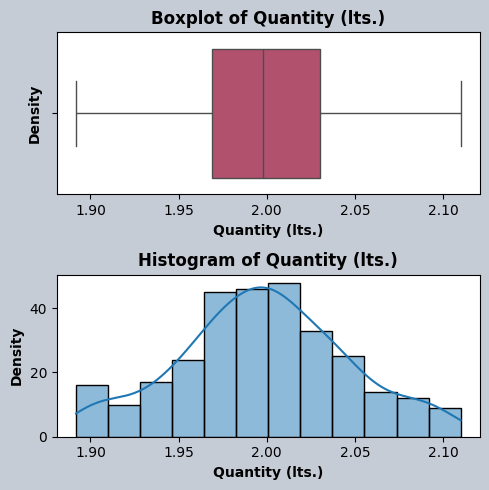

In [23]:
col = '#C6CCD6'

# Create a figure and axes for the plot
fig = plt.figure(figsize=(5,5), facecolor=col)
a = plt.subplot2grid((2, 2), (0, 0), colspan=2)
b = plt.subplot2grid((2, 2), (1, 0), colspan=2)

# Plot for distribution of origin
sns.boxplot(df['Quantity (lts.)'], ax=a, orient='h', palette='flare')
a.set_title('Boxplot of Quantity (lts.)', fontsize=12, fontweight='bold')
a.set_xlabel('Quantity (lts.)', fontweight='bold')
a.set_ylabel('Density', fontweight='bold')

# Histogram plot for distribution of flat area
sns.histplot(df['Quantity (lts.)'], kde=True, ax=b, palette='crest')
b.set_title('Histogram of Quantity (lts.)', fontsize=12, fontweight='bold')
b.set_xlabel('Quantity (lts.)', fontweight='bold')
b.set_ylabel('Density', fontweight='bold')

plt.tight_layout()

# Show the plot
plt.show()

We can witness approximately normal distribution within quantity while the same is overshadowed due to presence of outliers in CO2 dissolved
A histogram will gives a peek into how the  distribution looks like.
A box plot on the other hand helps  understand min, max and interquartile range where most of the data is centred around.


---



In [24]:
result = df.groupby('Assembly Line')['Time limit Crossed'].agg(['count','mean'])
print(result)

               count      mean
Assembly Line                 
A                139  0.143885
B                160  0.212500


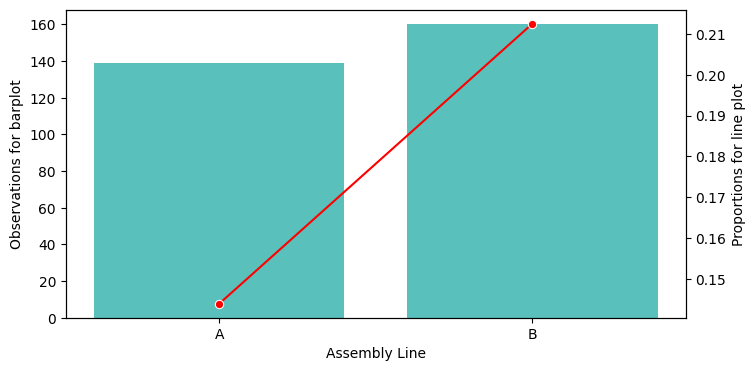

In [25]:
fig,ax1 = plt.subplots(figsize=(8,4))
sns.barplot(x=result.index, y = result['count'],ax=ax1, color = 'mediumturquoise')
ax2 =ax1.twinx()
sns.lineplot(data=result['mean'], marker ="o",sort ='False', color='red',ax=ax2)

ax1.set_xlabel('Assembly Line')
ax1.set_ylabel('Observations for barplot')
ax2.set_ylabel('Proportions for line plot')
plt.show()



In [26]:
correlation = df['Quantity (lts.)'].corr(df['CO2 dissolved'])
print(round(correlation,2))

0.05


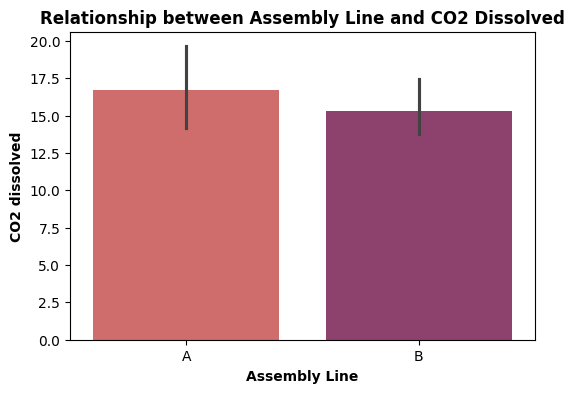

In [27]:
order = ['A', 'B']

# Create the barplot with the specified order
plt.figure(figsize=(6,4))
sns.barplot(x='Assembly Line', y='CO2 dissolved', data=df, order=order, palette='flare')

# Set labels and title
plt.xlabel('Assembly Line', fontweight='bold')
plt.ylabel('CO2 dissolved', fontweight='bold')
plt.title('Relationship between Assembly Line and CO2 Dissolved', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

Relationship between Assembly Line and CO2 Dissolved after outlier treatment.


---



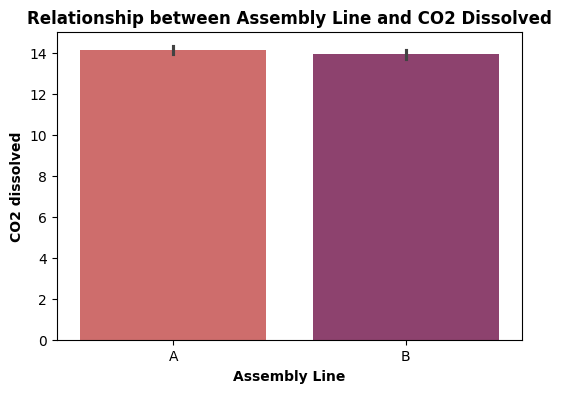

In [28]:
order = ['A','B']
plt.figure(figsize=(6,4))
sns.barplot(x= df['Assembly Line'], y = fillter_CO2['CO2 dissolved'], order = order, palette='flare')

# Set labels and title
plt.xlabel('Assembly Line', fontweight='bold')
plt.ylabel('CO2 dissolved', fontweight='bold')
plt.title('Relationship between Assembly Line and CO2 Dissolved', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


There is  significant correlations between numerical variables but there aresome differences in terms of carbonation and number of bottles that are crossing the time limit indicating the issues within the pipelines (though one of the issues could be due to a set of outliers).


---



**Probability distributions and interval estimates**
---



In [29]:
probabilities = df.groupby('Assembly Line')['Time limit Crossed'].mean()

# Display probabilities
print(round(probabilities,2))

Assembly Line
A    0.14
B    0.21
Name: Time limit Crossed, dtype: float64


In [30]:
p = 0.21
k = 10
n = 50
pmf = binom.pmf(k, n, p)
print(round(pmf,2))

0.14


In [31]:
p = 0.21
k = 10
n = 50
cdf = 1- binom.cdf(k, n, p)
print(round(cdf,2))

0.49


In [32]:
p =  0.14
k = 10
n = 50
pmf = binom.pmf(k, n, p)
print(round(pmf,2))

0.07


In [33]:
p = 0.14
k = 10
n = 50
cdf = 1- binom.cdf(k, n, p)
print(round(cdf,2))

0.08


By analysing these individual probabilities, I can understand that out of a randomly selected cohort of bottles, what are the chances of crossing the time limit within individual assembly lines. This clearly indicates that I may need to further investigate the root cause of taking higher time on assembly line B compared to A.

---



Assuming that, in 2 Litre soft drink bottles, the drink filled is close to normally distributed. If bottles contain less than 95% of the listed net content (around 1.90 litres), the manufacturer may be penalised by the state office of consumer affairs. Bottles that have a net quantity above 2.1 litres may cause excess spillage upon opening.


---



In [34]:
Q1 = df['Quantity (lts.)'].quantile(0.25)
Q3 = df['Quantity (lts.)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the nearest non-outlier values
df['Quantity (lts.)'] = df['Quantity (lts.)'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

print("DataFrame with outliers treated:")
print(df)

DataFrame with outliers treated:
          Id Assembly Line  Quantity (lts.)  CO2 dissolved  Time limit Crossed
0    1263945             B         1.971072      14.401617                   0
1    1828129             B         2.073388      14.137750                   0
2    1871804             A         2.019492      14.774384                   0
3    1128634             A         2.004422      15.130565                   0
4    1848595             B         2.025784      15.756478                   0
..       ...           ...              ...            ...                 ...
294  1222073             A         1.974539      14.249096                   0
295  1272076             B         1.974851      14.175526                   1
296  1520410             B         1.991623      13.460719                   0
297  1226204             B         1.935333      12.189065                   1
298  1483198             A         2.007043      13.775047                   1

[299 rows x 5 colu

In [35]:
mean = df['Quantity (lts.)'].mean()
sd = df['Quantity (lts.)'].std()
print(f'mean: {mean}')
print(f'Standard Deviation: {sd}')

mean: 1.9979921506177474
Standard Deviation: 0.04802650818000254


In [36]:
mean = df['Quantity (lts.)'].mean()
sd = df['Quantity (lts.)'].std()

print(f'mean: {mean}')
print(f'Standard Deviation: {sd}')
cdf1 = norm.cdf(1.9, loc= mean, scale = sd )
cdf2 = 1 - norm.cdf(2.1,loc= mean, scale = sd)
probability = cdf1 + cdf2
print(round(probability,2))

mean: 1.9979921506177474
Standard Deviation: 0.04802650818000254
0.04


In [37]:
cdf = norm.interval(0.9, loc= mean, scale = sd)
print(cdf)

(1.9189955744480556, 2.076988726787439)



There are very low chances of filling the bottle before 1.9 lts. And above 2.1 lts. except a few instances which can be fixed in the later stages. The 90% interval estimates indicate the same theory since most of the values are bound to fall within 1.9-2.1 litres range.

---



**Summary**

1. Higher Processing Time: In my analysis, I have witnessed that assembly line B has higher chances of introducing latency in filling the bottles as compared to assembly line A. This definitely has a negative impact on overall production as it slows down the production rate and therefore can affect the final shipment.
The recommendation over here is to investigate the root cause asap. This may include fixing or upgrading the components involved in the production line, updating the softwares involved, etc.

2. Higher Carbonation: I have encountered certain problems with CO2 dissolved or carbonation analysis. The carbonation values are very high (>15 gms per litre). Furthermore, there are 24.85% chances of getting high carbonation which may lead to higher spillage upon opening the bottle.
This issue needs to be addressed immediately. Understand that it could be a data issue as well since there were outliers registered in CO2 dissolved and therefore, I need to collect other samples to conclude things later on.


---


